In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
with open("test_df.pkl","rb") as file:
  test_df = pickle.load(file)
with open("encoder_dict.pkl","rb") as file:
  encoder_dict = pickle.load(file)
with open("scaler.pkl","rb") as file:
  scaler = pickle.load(file)
with open("model.pkl","rb") as file:
  model = pickle.load(file)

In [76]:
test_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
6252,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0,1,GOLD,709,0
4684,623,France,Male,43,1,0.00,2,1,1,146379.30,0,2,SILVER,508,0
1731,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0,1,GOLD,281,0
4742,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0,2,SILVER,979,0
4521,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0,5,SILVER,457,0


In [77]:
test_df['Tenure'].value_counts()

Tenure
1     220
8     220
9     216
3     208
2     204
7     196
6     190
4     186
5     183
10     97
0      80
Name: count, dtype: int64

In [78]:
X_test = test_df.drop("Exited",axis=1)
y_test = test_df['Exited']

In [79]:
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
6252,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0,1,GOLD,709
4684,623,France,Male,43,1,0.00,2,1,1,146379.30,0,2,SILVER,508
1731,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0,1,GOLD,281
4742,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0,2,SILVER,979
4521,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0,5,SILVER,457


In [80]:
# Encoding
for i in encoder_dict:
  encoder = encoder_dict[i]
  X_test[i] = encoder.transform(X_test[i])
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
6252,596,1,1,32,3,96709.07,2,0,0,41788.37,0,1,1,709
4684,623,0,1,43,1,0.00,2,1,1,146379.30,0,2,3,508
1731,601,2,0,44,4,0.00,2,1,0,58561.31,0,1,1,281
4742,506,1,1,59,8,119152.10,2,1,1,170679.74,0,2,3,979
4521,560,2,0,27,7,124995.98,1,1,1,114669.79,0,5,3,457


In [81]:
# Scaling
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
6252,-0.577496,0.301649,0.913248,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,-0.509942,-1.432186,-0.445044,0.454493
4684,-0.297297,-0.905550,0.913248,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,-0.509942,-0.720010,1.346327,-0.439084
1731,-0.525607,1.508847,-1.094993,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,-0.509942,-1.432186,-0.445044,-1.448249
4742,-1.511492,0.301649,0.913248,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,-0.509942,-0.720010,1.346327,1.654821
4521,-0.951094,1.508847,-1.094993,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,-0.509942,1.416518,1.346327,-0.665813


In [82]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,2000.0,-0.058054,1.013795,-3.130418,-0.764295,-0.053421,0.628915,2.058448
Geography,2000.0,-0.023088,0.994733,-0.905550,-0.905550,-0.905550,0.301649,1.508847
Gender,2000.0,0.004519,0.999829,-1.094993,-1.094993,0.913248,0.913248,0.913248
Age,2000.0,0.011432,0.985362,-1.986800,-0.655786,-0.085351,0.485083,5.048560
Tenure,2000.0,0.015486,1.018057,-1.736467,-1.042418,-0.001345,1.039728,1.733777
Balance,2000.0,0.030721,0.994830,-1.218471,-1.218471,0.379370,0.828889,2.241662
NumOfProducts,2000.0,-0.010135,1.016980,-0.916688,-0.916688,-0.916688,0.808436,4.258684
HasCrCard,2000.0,0.021896,0.990201,-1.540351,-1.540351,0.649203,0.649203,0.649203
IsActiveMember,2000.0,0.023508,0.999374,-1.025834,-1.025834,0.974817,0.974817,0.974817
EstimatedSalary,2000.0,-0.029649,0.999228,-1.745964,-0.881833,-0.033375,0.815190,1.731038


In [83]:
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()

0    1607
1     393
Name: count, dtype: int64

In [84]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [85]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1606,    1],
       [   1,  392]])

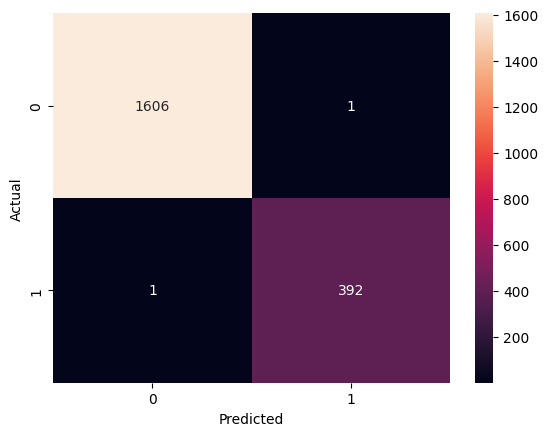

In [86]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [87]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
6252,-0.577496,0.301649,0.913248,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,-0.509942,-1.432186,-0.445044,0.454493
4684,-0.297297,-0.905550,0.913248,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,-0.509942,-0.720010,1.346327,-0.439084
1731,-0.525607,1.508847,-1.094993,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,-0.509942,-1.432186,-0.445044,-1.448249
4742,-1.511492,0.301649,0.913248,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,-0.509942,-0.720010,1.346327,1.654821
4521,-0.951094,1.508847,-1.094993,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,-0.509942,1.416518,1.346327,-0.665813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,-0.515230,0.301649,-1.094993,1.340735,-0.001345,0.354911,-0.916688,-1.540351,0.974817,-0.963100,1.961007,1.416518,0.450642,0.916842
8285,-0.442586,-0.905550,0.913248,-1.321293,1.733777,-1.218471,-0.916688,-1.540351,0.974817,0.164545,-0.509942,-0.720010,0.450642,0.201091
7853,0.813120,-0.905550,-1.094993,0.770301,0.692704,-1.218471,-0.916688,0.649203,-1.025834,-1.165916,1.961007,-0.720010,0.450642,-0.456867
1095,0.418766,-0.905550,0.913248,-0.941003,-0.348369,-1.218471,-0.916688,0.649203,-1.025834,-0.411635,1.961007,-0.007834,0.450642,0.352243


In [93]:
test_df[test_df['Exited']==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
5202,597,Germany,Female,22,6,101528.61,1,1,0,70529.00,1,2,SILVER,793,1
2750,481,France,Female,57,9,0.00,3,1,1,169719.35,1,3,SILVER,259,1
7487,651,France,Female,56,4,0.00,1,0,0,84383.22,1,1,PLATINUM,517,1
5272,850,France,Male,47,6,0.00,1,1,0,187391.02,1,3,DIAMOND,282,1
4640,687,France,Female,44,9,0.00,2,0,0,103042.20,1,4,DIAMOND,309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,683,Germany,Female,43,4,115888.04,1,1,1,117349.19,1,5,PLATINUM,443,1
6412,602,Germany,Female,53,5,98268.84,1,0,1,45038.29,1,5,PLATINUM,813,1
7853,730,France,Female,47,7,0.00,1,1,0,33373.26,1,2,PLATINUM,504,1
1095,692,France,Male,29,4,0.00,1,1,0,76755.99,1,3,PLATINUM,686,1
